In [1]:
import numpy as np
from network import Network
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
import metrics

plt.rcParams.update({'font.size': 20})
plt.rc('figure', figsize=(20, 10))
plt.rc('figure', facecolor=(1,1,1,1))


## Ejercicio 1

In [ ]:
def plot(dataset, network):
    X = [x[0][0] for x in dataset]
    Y = [x[0][1] for x in dataset]
    c = [x[1][0] for x in dataset]

    plt.scatter(X, Y, c=c,  cmap="coolwarm",s=100)

    m, a, b = network.w[-1][0]  # mx + ay + b = 0

    x = np.linspace(-2, 2, 100)
    y = (-m*x - b)/a
    plt.plot(x, y)
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.xticks([-1, 1])
    plt.yticks([-1, 1])
    plt.xlabel('E1')
    plt.ylabel('E2')
    plt.show()


### 1.a

In [ ]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [-1]],
    [[1, -1], [-1]],
    [[1, 1], [1]]
]

network = Network(structure=([2, 1]), activation='step', seed=17)
errors = network.train(dataset, target_error=0)
print("Epochs:", len(errors))
plt.figure("AND")
plot(dataset, network)



#### animation

In [ ]:
plt.figure("AND animation")
data = []
x = np.linspace(-2, 2, 100)
line, = plt.plot(x, x)
X = [x[0][0] for x in dataset]
Y = [x[0][1] for x in dataset]
c = [x[1][0] for x in dataset]
plt.xticks([-1, 1])
plt.yticks([-1, 1])
plt.xlabel('E1')
plt.ylabel('E2')
plt.scatter(X, Y, c=c, cmap="coolwarm", s=100)


def callback(network):
    m, a, b = network.w[-1][0]  # mx + ay + b = 0
    data.append((m, a, b))


def update(frame):
    m, a, b = data[frame]
    y = (-m*x - b)/a
    line.set_ydata(y)
    return line


network = Network(structure=([2, 1]), activation='tanh', seed=17)

network.train(dataset, epochs=100, callback=callback, learning_rate=0.01)
anim = animation.FuncAnimation(
    plt.gcf(), update, frames=len(data)-1, interval=1)

anim.save('ej1.a.mp4', fps=60)

anim = []

update(len(data)-1)

plt.show()


### 1.b

In [ ]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [1]],
    [[1, -1], [1]],
    [[1, 1], [-1]]
]


network = Network(structure=([2, 1]), activation='step', seed=17)
network.train(dataset, epochs=1000)

plot(dataset, network)


## Ejercicio 2

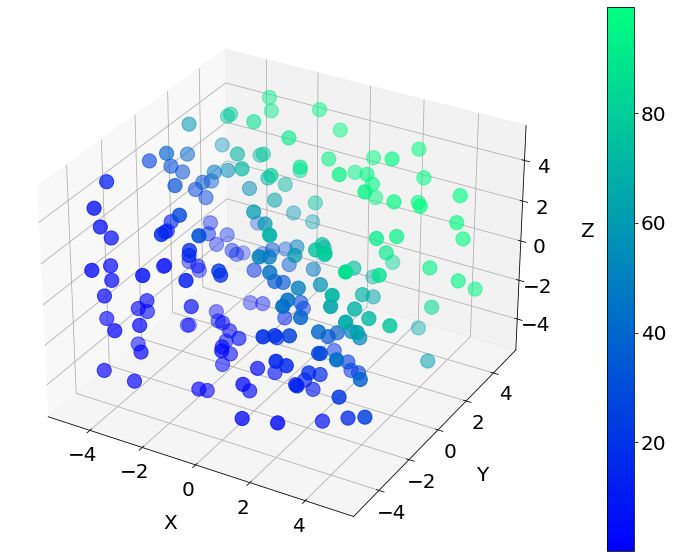

In [3]:
from datasets import training_dataset_2

expected = [y[0] for x, y in training_dataset_2]

max_value = max(expected)
min_value = min(expected)

delta = (max_value - min_value)/2

normalized = []

for (x, y), v in zip(training_dataset_2, expected):
    e = (v - min_value)/delta - 1
    normalized.append((x, [e]))


def plot3d(X,Y,Z, c, min = min_value, max = max_value, map="winter"):
    ax = plt.axes(projection='3d')
    s = ax.scatter3D(X, Y, Z, c=c, cmap=map, s=200, vmin=min, vmax=max)
    ax.set_xlabel('X', labelpad=20)
    ax.set_ylabel('Y', labelpad=20)
    ax.set_zlabel('Z', labelpad=20)
    plt.colorbar(s)


plt.figure("Dataset 2")

X = [x[0][0] for x in training_dataset_2]
Y = [x[0][1] for x in training_dataset_2]
Z = [x[0][2] for x in training_dataset_2]
C = [x[1][0] for x in training_dataset_2]

plot3d(X,Y,Z, C)

plt.show()


### Lineal

Error: 46.44223921665171
Epochs: 100


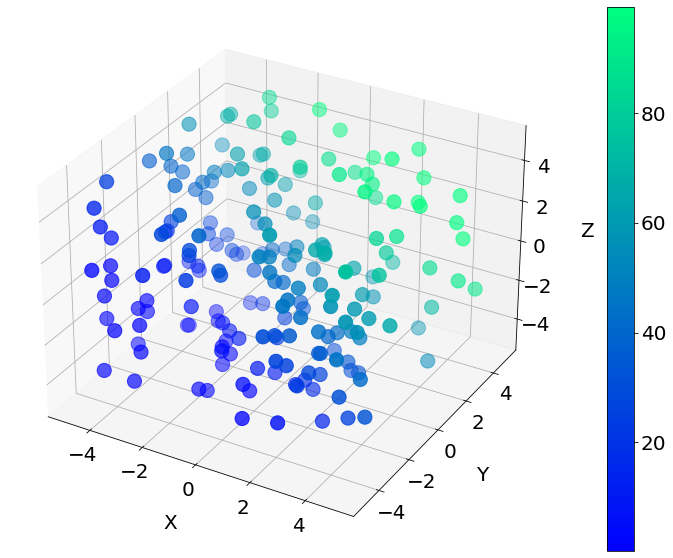

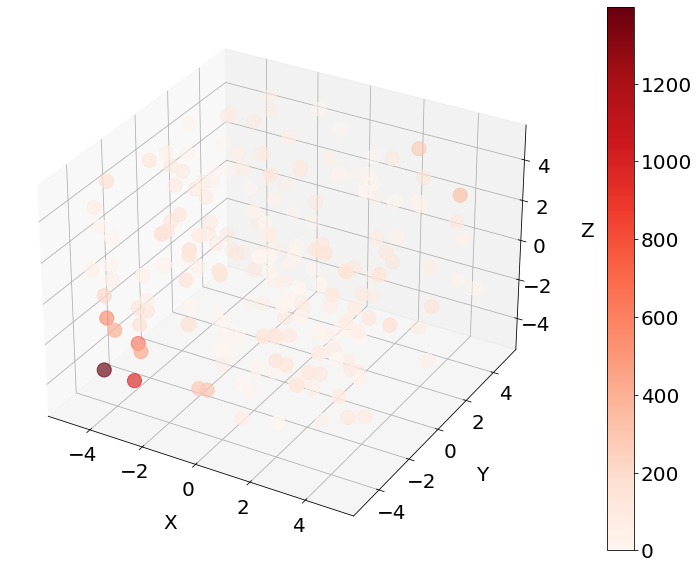

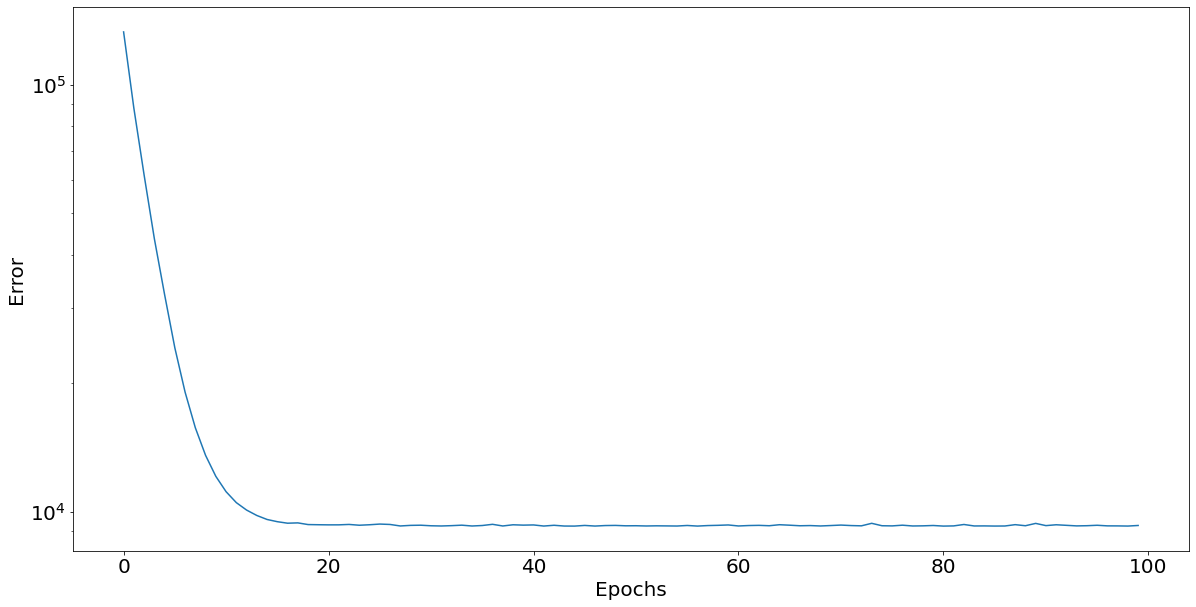

In [3]:
network = Network(structure=[3, 1],
                  activation='lineal', seed=17, args={'b': 0.8})
errors = network.train(training_dataset_2, batch_size=1,
                       epochs=100, learning_rate=0.001, momentum=0.4)

print("Error:", errors[-1]/len(training_dataset_2))
print("Epochs:", len(errors))

plt.figure("Lineal network")

c = np.array([network.feedforward(x)[0] for x, y in training_dataset_2])

plot3d(X, Y, Z, c)

plt.show()

plt.figure("Lineal error heatmap")
err = (c-C)**2
max_error = max(err)
plot3d(X, Y, Z, err, min=0, max=max_error, map="Reds")


plt.figure("Lineal error")
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(errors)
plt.show()


### No lineal

Error: 2.9087231877876385
Epochs: 100


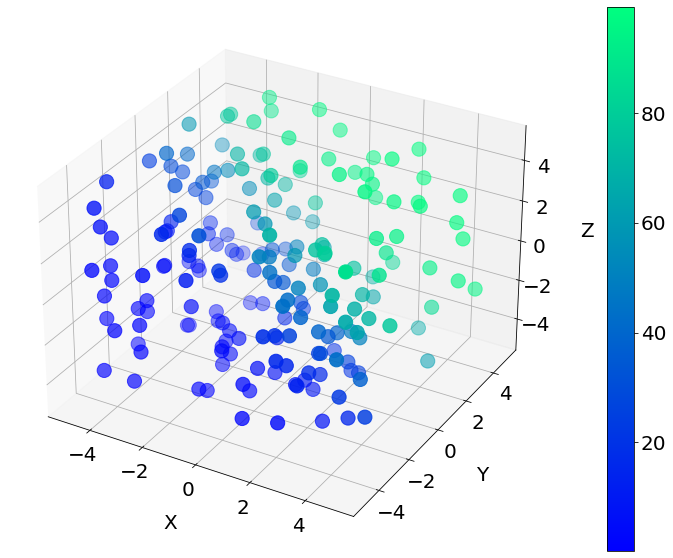

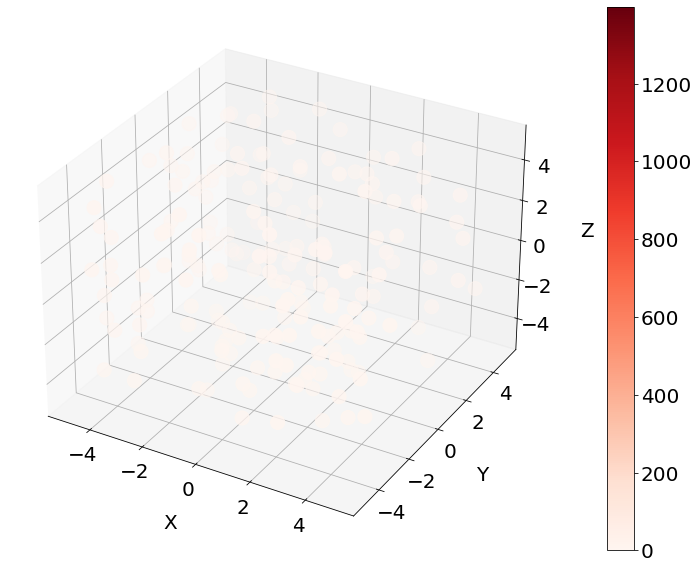

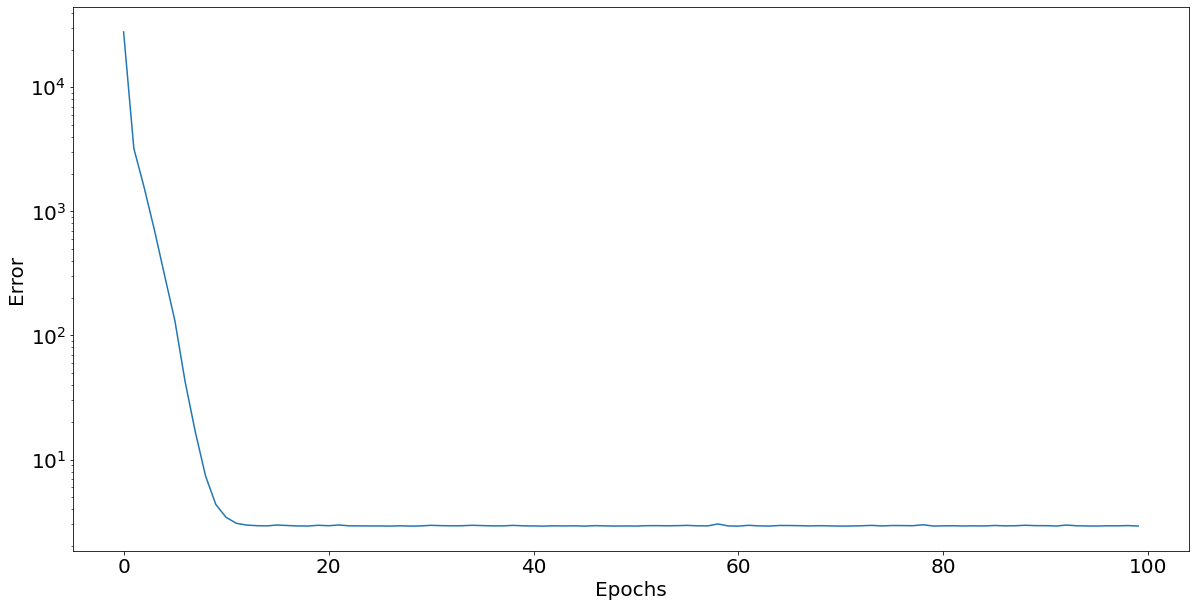

In [4]:
network = Network(structure=([3, 1]), activation='tanh', seed=17)
errors = network.train(normalized, epochs=100, learning_rate=0.01, momentum=0)
errors = np.array(errors)*delta**2
print("Error:", errors[-1])
print("Epochs:", len(errors))

plt.figure("no lineal network")

c = np.array([network.feedforward(x)[0] for x, y in training_dataset_2])

c = (c+1)*delta + min_value

plot3d(X,Y,Z, c)

plt.show()

plt.figure("no Lineal error heatmap")



err = (c-C)**2
plot3d(X, Y, Z, err, min=0, max=max_error, map="Reds")


plt.figure("Non-lineal error")
plt.yscale('log')
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()


### Comparison

Error: 1.0399897570061698


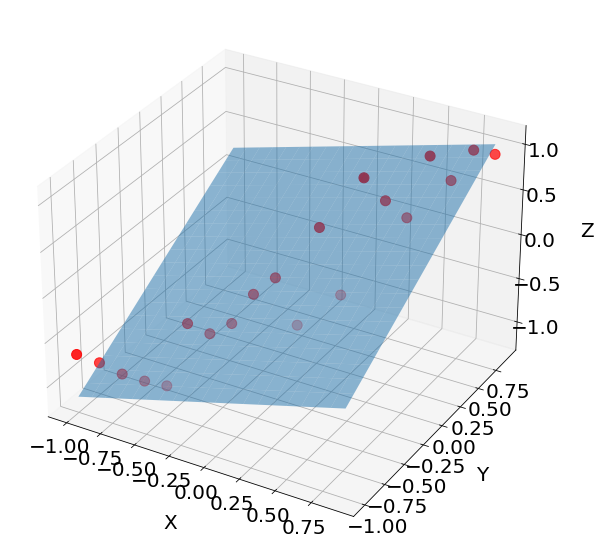

Error: 0.8187283022934175


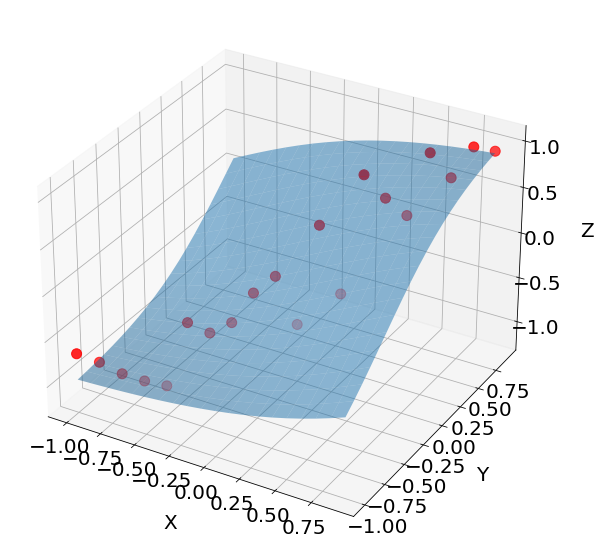

In [5]:
X = np.arange(-1,1, 0.1)
Y = np.arange(-1,1, 0.1)
Z = np.arange(-1,1, 0.1)

rng =np.random.default_rng(17)

randoms = rng.normal(0,0.3, Z.shape)

Z += randoms

dataset = [ ([x,y],[z]) for x,y,z in zip(X,Y,Z) ]

activations = ['lineal', 'tanh']


for activation in activations:
    network = Network(structure=[2,1], activation=activation, seed=3)
    errors = network.train(dataset, epochs=100)
    print("Error:", errors[-1])

    plt.figure("transformation {}".format(activation))
    ax = plt.axes(projection='3d')


    ax.scatter3D(X, Y, Z, c="red", s=100)

    XP,YP = np.meshgrid(X,Y)

    O = np.zeros((len(X), len(Y)))

    for i,(r1,r2) in enumerate(zip(XP,YP)):
        for j,(x,y) in enumerate(zip(r1,r2)):
            z = network.feedforward([x,y])[0]
            O[i][j] = z




    ax.plot_surface(XP, YP, O, alpha=0.5)
    ax.set_xlabel('X', labelpad=20)
    ax.set_ylabel('Y', labelpad=20)
    ax.set_zlabel('Z', labelpad=20)
    plt.show()

### Metrics

In [9]:
network = Network(structure=([3, 1]),
                  activation='lineal', seed=17, args={'b': 0.8})    
epsilon = 1       
network,precision,precision_training,test,training = metrics.cross_validation(training_dataset_2, network, k=5,  epochs=100, metric = lambda n,d: metrics.accuracy(n,d,epsilon),lr=0.001,m=0)
print(precision)
print(precision_training)

0.075
0.05


In [10]:
network = Network(structure=([3, 1]), activation='tanh', seed=17)
print(delta)
network,precision,precision_training,test,training = metrics.cross_validation(normalized, network, k=5,  epochs=100, metric = lambda n,d: metrics.accuracy(n,d,epsilon/delta))
print(precision)
print(precision_training)

1.0
1.0


## Ejercicio 3

### 3.a

In [ ]:
lim = 1
size = 100
x = np.linspace(-lim, lim, size)
y = np.linspace(-lim, lim, size)
sample = [[i, j] for i in x for j in y]


def plot(network):
    img = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            img[i][j] = network.feedforward([x[i], y[j]])[0]
    plt.xlabel("E1")
    plt.ylabel("E2")
    plt.pcolormesh(x, y, img, vmin=-1, vmax=1,
                   shading="gouraud", cmap="coolwarm")
    plt.colorbar()


In [ ]:
dataset = [
    [[-1, -1], [-1]],
    [[-1, 1], [1]],
    [[1, -1], [1]],
    [[1, 1], [-1]]
]

network = Network(structure=(
    [2, 2, 1]), activation='tanh', seed=17, args={'b': 0.8})
errors = network.train(dataset, learning_rate=0.1,
                       target_error=0.01, momentum=0.9)
print("Epochs: ", len(errors))
print("Error: {:.2e}".format(network.error(dataset)))
plot(network)
plt.show()

In [ ]:
plt.figure("Error vs epoch")
rates = [0.01, 0.05, 0.1, 0.2,]
for rate in rates:
    network = Network(structure=([2, 2, 1]),
                      activation='tanh', seed=17, args={'b': 1})
    errors = network.train(dataset, learning_rate=rate,
                           epochs=1000, momentum=0)
    plt.plot(errors, label="Learning rate: {}".format(rate))
plt.legend()
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()


In [ ]:
plt.figure("Error vs epoch - momentum")
momentums = [0, 0.3, 0.7, 0.9]
for m in momentums:
    network = Network(structure=([2, 2, 1]),
                      activation='tanh', seed=17, args={'b': 1})
    errors = network.train(dataset, epochs=1000, momentum=m)
    plt.plot(errors, label="Momentum: {}".format(m))
plt.legend()
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()


In [ ]:
plt.figure("Error vs epoch - batch")
batch = [1,2,4]
for b in batch:
    network = Network(structure=([2, 2, 1]),
                      activation='tanh', seed=17, args={'b': 1})
    errors = network.train(dataset, epochs=1000, momentum=0, learning_rate=0.1, batch_size=b)
    plt.plot(errors, label="batch size: {}".format(b))
plt.legend()
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()


In [ ]:
plt.figure("Error vs epoch - b")
bs = [0.5,0.8,1,2,3,4,5,6,7,8]
for b in bs:
    network = Network(structure=([2, 2, 1]),
                      activation='tanh', seed=17, args={'b': b})
    errors = network.train(dataset, epochs=1000, momentum=0, learning_rate=0.001, batch_size=1)
    plt.plot(errors, label="b: {}".format(b))
plt.legend()
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()


### Limit cases

In [ ]:
plt.figure("Error vs epoch - limits")
combinations = [ # lr bs m b label
    [0.9, 1, 0, 1, "learning rate: 0.9"],
    [0.1, 1, 1, 1, "momentum: 1"],
    [0.1, 1, 0, 4, "b: 4"]
]
for c in combinations:
    network = Network(structure=([2, 2, 1]),
                      activation='tanh', seed=17, args={'b': c[3]})
    errors = network.train(dataset, epochs=1000, momentum=c[2], learning_rate=c[0], batch_size=c[1])
    plt.plot(errors, label=c[4])
plt.legend()
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()


#### Animation

In [ ]:
imgs = []

size = 25
lim = 1
x = np.linspace(-lim, lim, size)
y = np.linspace(-lim, lim, size)

sample = [[i, j] for i in x for j in y]

plt.figure("temperature map animation")

mesh = plt.pcolormesh(x, y, np.zeros((size, size)), vmin=-1,
                      vmax=1, cmap="coolwarm", shading="gouraud")

plt.colorbar()

def callback(network):
    img = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            img[i][j] = network.feedforward([x[i], y[j]])[0]
    imgs.append(img)


def update(frame):
    mesh.set_array(np.array(imgs[frame]).ravel())
    return mesh


network = Network(structure=(
    [2, 2, 1]), activation='tanh', seed=17, args={'b': 1})
network.train(dataset, learning_rate=0.1, epochs=40,
              momentum=0.9, callback=callback)

# callback(network)
# update(len(imgs)-1)

# plt.show()

anim = animation.FuncAnimation(plt.gcf(), update, frames=len(imgs), interval=1)

anim.save('ej3.a.mp4', fps=30)

anim = None

update(len(imgs)-1)

plt.show()


### More heatmaps

In [ ]:
lim = 2
size=200
x = np.linspace(-lim, lim, size)
y = np.linspace(-lim, lim, size)
sample = [[i, j] for i in x for j in y]

structures = [
    [2, 3, 1],
    [2, 15,10, 1],
    [2,10,15,1]
]


for s in structures:
    plt.figure("heatmap with {} neurons".format(s), figsize=(10, 5))
    network = Network(structure=s, activation='tanh', seed=17, args={'b': 0.8})
    errors = network.train(dataset, learning_rate=0.1,
                           target_error=0.01, momentum=0.9)
    print("Epochs: ", len(errors))
    print("Error: {:.2e}".format(network.error(dataset)))
    print("Structure: ", s)
    plot(network)
    plt.scatter([x[0] for x,y in dataset], [x[1] for x,y in dataset], c="black")
    plt.show()


### 3.b

In [ ]:
from datasets import number_images

dataset = []

for i, img in enumerate(number_images):
    dataset.append((np.array(img).flatten(), [1-i % 2]))


In [ ]:
network = Network(structure=([35, 20, 1]),
                  activation='sigmoid', seed=17, args={'b': 1})
errors = network.train(dataset, learning_rate=0.1, epochs=500, momentum=0.9)

print("Epochs: ", len(errors))
print("Error: {:.2e}".format(errors[-1]))

plt.figure("error - Par o impar")
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(errors)
plt.show()

x = [i for i in range(10)]
y = [network.feedforward(dataset[i][0])[0] for i in x]

plt.figure("par o impar")
plt.scatter(x, y)
plt.xticks(x)
plt.ylabel("Impar - Par")
plt.xlabel("Numero")
plt.show()


### 3.c

In [ ]:
from datasets import number_images

dataset = []

X = np.array([i for i in range(11)]) - 0.5

for i, img in enumerate(number_images):
    dataset.append((np.array(img).flatten(), [
                   1 if j == i else 0 for j in range(10)]))


In [ ]:
network = Network(structure=([35, 30, 20, 10]),
                  activation='sigmoid', seed=17, args={'b': 1})
errors = network.train(dataset, learning_rate=1, epochs=50, momentum=0)
print("Error: ", errors[-1])
print("Epochs: ", len(errors))
plt.figure("error - number recon")
plt.yscale('log')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(errors)
plt.show()

plt.figure("probability - number recon")

x = [i for i in range(10)]
matrix = []
for i in range(10):
    matrix.append(network.feedforward(dataset[i][0]))
    #plt.scatter(x,matrix[-1], label=i)
plt.pcolormesh(X, X, np.array(matrix).reshape(10, 10),
               cmap="coolwarm", vmin=0, vmax=1)

plt.xlabel("Numero")
plt.ylabel("Probabilidad")
ticks = [i for i in range(10)]
plt.xticks(ticks)
plt.yticks(ticks)
plt.show()


### Noise

In [ ]:
from utils import noise
noise_data = [[noise(img, 0.02, seed=17), output] for img, output in dataset]

plt.figure("probability - noise - number recon")

x = [i for i in range(10)]
matrix = []
for i in range(10):
    # lt.scatter(xxomatrix[-1], label=i
    matrix.append(network.feedforward(noise_data[i][0]))
print(network.error(noise_data))
plt.pcolormesh(X, X, np.array(matrix).reshape(10, 10),
               cmap="coolwarm", vmin=0, vmax=1)

plt.xticks(x)
plt.yticks(x)
plt.xlabel("Numero")
plt.ylabel("Probabilidad")
plt.show()


In [ ]:
seeds = [i for i in range(1000)]

noise_data = []

for i in seeds:
    noise_data += [[noise(img, 0.02, seed=i), output]
                   for img, output in dataset]

classes = [output for img, output in dataset]
expected = [output for img, output in noise_data]
output = [network.feedforward(img) for img, output in noise_data]

mat, accuracy = metrics.confusion_matrix(classes, output, expected)

mat = mat.astype(int)

colours = []

for i in range(len(mat)-1):
    row = []
    for j in range(len(mat)-1):
        if i == j:
            row.append('#FFAAAA')
        else:
            row.append('#FFFFFF')
    row.append('#AAFFAA')
    colours.append(row)

row = []
for i in range(len(mat)):
    row.append('#AAFFAA')
colours.append(row)


labels = [f" {i} " for i in range(10)]
print("Accuracy: ", accuracy)
plt.figure("table", figsize=(5, 5))
plt.axis("off")
t = plt.table(cellText=mat,
          loc='center',
          cellLoc='center',
          rowLabels=labels + [" P"],
          colLabels=labels + ["R"],
          rowColours=['#FFFF00'] * 10 + ['#AAAAFF'],
          colColours=['#FFFF00'] * 10 + ['#AAAAFF'],
          cellColours=colours,
          )

t.set_fontsize(20)
t.scale(1,2)


plt.gcf().tight_layout()
plt.show()
